In [1]:
import sys
from collections import namedtuple

import numpy as np

%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

import lmfit

from joblib import Parallel, delayed  
import multiprocessing

np.random.seed(666)

import pandas as pd
class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

In [2]:
import cPickle as pickle
import gzip
(results, results2, results3) = pickle.load(gzip.GzipFile("results.p.gz", "rb"))

### Investigate the poor performance of ip_diffim dipole fitter on small separations...

(-10000, 10000)

/Users/dreiss/miniconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


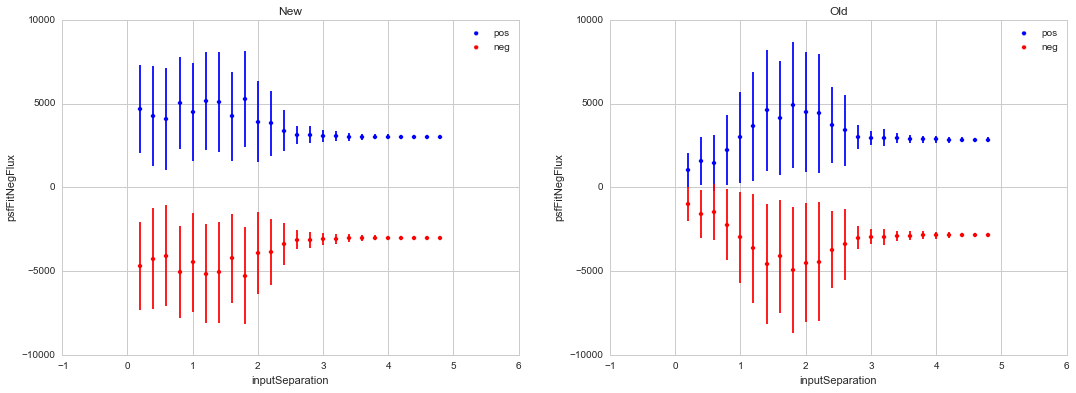

In [4]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df = pd.DataFrame([res['new'] for res in results])
tmp_df = df.groupby('inputSeparation').mean()
tmp_df['inputSeparation'] = tmp_df.index.values
tmp_df2 = df.groupby('inputSeparation').std() * 1.
ax = tmp_df.plot(x='inputSeparation', y='psfFitPosFlux', kind='scatter', yerr=tmp_df2['psfFitPosFlux'], color='blue', label='pos', ax=axes[0])
tmp_df.plot(x='inputSeparation', y='psfFitNegFlux', kind='scatter', yerr=tmp_df2['psfFitNegFlux'], color='red', label='neg', ax=ax)

df = pd.DataFrame([res['old'] for res in results])
tmp_df = df.groupby('inputSeparation').mean()
tmp_df['inputSeparation'] = tmp_df.index.values
tmp_df2 = df.groupby('inputSeparation').std() * 1.
ax = tmp_df.plot(x='inputSeparation', y='psfFitPosFlux', kind='scatter', yerr=tmp_df2['psfFitPosFlux'], color='blue', label='pos', ax=axes[1])
tmp_df.plot(x='inputSeparation', y='psfFitNegFlux', kind='scatter', yerr=tmp_df2['psfFitNegFlux'], color='red', label='neg', ax=ax)

axes[0].set_title('New')
axes[0].set_ylim([-10000,10000])
axes[1].set_title('Old')
axes[1].set_ylim([-10000,10000])

(-2000, 15000)

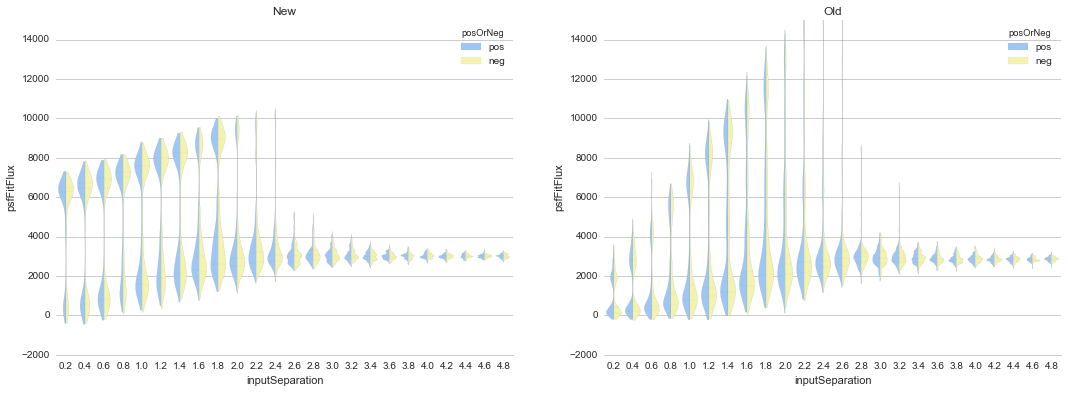

In [5]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df1 = pd.DataFrame([res['new'] for res in results])
df2 = df1.copy()
df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
sns.violinplot(x="inputSeparation", y="psfFitFlux", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.1, bw=0.2, ax=axes[0])
sns.despine(left=True)

df1 = pd.DataFrame([res['old'] for res in results])
df2 = df1.copy()
df1['psfFitFlux'] = df1.psfFitPosFlux   # positive
df1['posOrNeg'] = np.repeat('pos', df1.shape[0])
df1.loc[(df1.psfFitFlux > 30000.), 'psfFitFlux'] = 30000.
df2['psfFitFlux'] = -df2.psfFitNegFlux   # negative
df2['posOrNeg'] = np.repeat('neg', df2.shape[0])
df2.loc[(df2.psfFitFlux > 30000.), 'psfFitFlux'] = 30000.
sns.violinplot(x="inputSeparation", y="psfFitFlux", hue="posOrNeg", data=df1.append(df2), split=True,
               inner="quart", palette={"pos": "b", "neg": "y"}, cut=True, linewidth=0.1, bw=0.2, ax=axes[1])
sns.despine(left=True)

axes[0].set_title('New')
axes[0].set_ylim([-2000,15000])
axes[1].set_title('Old')
axes[1].set_ylim([-2000,15000])

(70, 110)

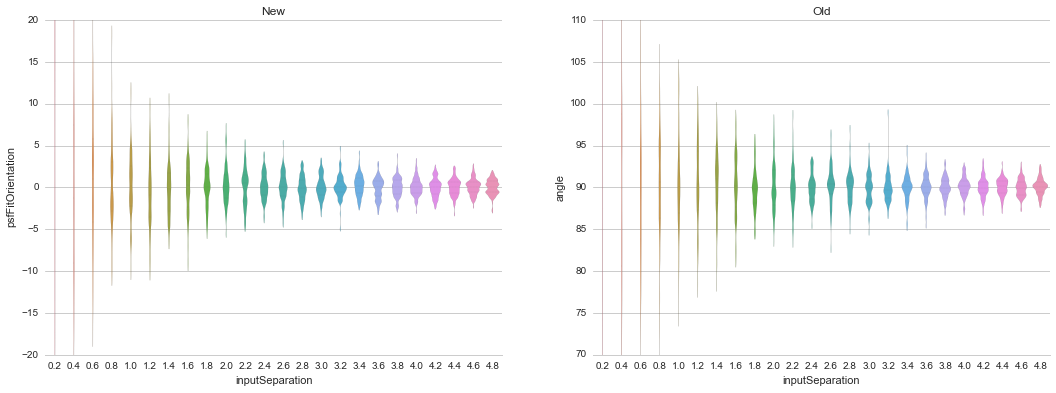

In [43]:
matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

df = pd.DataFrame([res['new'] for res in results])
# tmp_df = df.groupby('inputSeparation').mean()
# tmp_df['inputSeparation'] = tmp_df.index.values
# tmp_df2 = df.groupby('inputSeparation').std() * 1.
#ax = tmp_df.plot(x='inputSeparation', y='psfFitOrientation', kind='scatter', yerr=tmp_df2['psfFitPosFlux'], color='blue', label='pos', ax=axes[0])
#tmp_df.plot(x='inputSeparation', y='psfFitNegFlux', kind='scatter', yerr=tmp_df2['psfFitNegFlux'], color='red', label='neg', ax=ax)
sns.violinplot(x="inputSeparation", y="psfFitOrientation", data=df, inner="quart", cut=True, linewidth=0.1, bw=0.2, ax=axes[0])
sns.despine(left=True)

df = pd.DataFrame([res['old'] for res in results])
df['angle'] = pd.Series([float(i * 180. / np.pi) for i in df.psfFitOrientation])
# tmp_df = df.groupby('inputSeparation').mean()
# tmp_df['inputSeparation'] = tmp_df.index.values
# tmp_df2 = df.groupby('inputSeparation').std() * 1.
#ax = tmp_df.plot(x='inputSeparation', y='angle', kind='scatter', yerr=tmp_df2['psfFitPosFlux'], color='blue', label='pos', ax=axes[1])
#tmp_df.plot(x='inputSeparation', y='psfFitNegFlux', kind='scatter', yerr=tmp_df2['psfFitNegFlux'], color='red', label='neg', ax=ax)
sns.violinplot(x="inputSeparation", y="angle", data=df, inner="quart", cut=True, linewidth=0.1, bw=0.2, ax=axes[1])
sns.despine(left=True)

axes[0].set_title('New')
axes[0].set_ylim([-20,20])
axes[1].set_title('Old')
axes[1].set_ylim([70,110])

### Let's take a look at one of the fits with an erroneously big fit flux...

First need to load up the fitting functions...

In [7]:
## LSST imports:
import lsst.utils.tests as tests
import lsst.daf.base as dafBase
#import lsst.afw.display.ds9 as ds9
import lsst.afw.image as afwImage
import lsst.afw.geom as afwGeom
import lsst.afw.table as afwTable
import lsst.afw.math as afwMath
import lsst.meas.algorithms as measAlg
import lsst.ip.diffim as ipDiffim

In [132]:
def singleGaussian2d(x, y, xc, yc, sigma_x=1., sigma_y=1., theta=0., offset=0.):
    cos_theta2, sin_theta2 = np.cos(theta)**2., np.sin(theta)**2.
    sigma_x2, sigma_y2 = sigma_x**2., sigma_y**2.
    a = cos_theta2/(2.*sigma_x2) + sin_theta2/(2.*sigma_y2)
    b = -(np.sin(2.*theta))/(4.*sigma_x2) + (np.sin(2.*theta))/(4.*sigma_y2)
    c = sin_theta2/(2.*sigma_x2) + cos_theta2/(2.*sigma_y2)
    xxc, yyc = x-xc, y-yc
    out = np.exp( - (a*(xxc**2.) + 2.*b*xxc*yyc + c*(yyc**2.)))
    if offset != 0.:
        out += offset
    return out

verbose = False    # BAD !!!

def generateNoiseImage(z, bg=1.): ##, verbose=True):
    global verbose     # BAD !!!
    if verbose: 
        npix = np.prod(z.shape)
        print 'SNR:', z.sum(), bg, npix*bg, z.sum() / np.sqrt(z.sum() + 2.*(bg*npix))
    return np.random.poisson(z+bg, z.shape)

def generateStarImage(x, flux, xcen, ycen, psfWidth, sigma2=None, ampl2=0.1, afw=False, noise=0.):
    """
    Stellar thumbnail based on 2-d (potentially [TBD] ellipsoidal) double-gaussian: 
    generateStarImage(x, flux, xcen, ycen, psfWidth, sigma2=None, ampl2=0.1, afw=False, noise=0.)
    """
    if sigma2 is None:
        sigma2 = psfWidth * 1.75
        
    if afw:
        ## Wow - this is about 3x slower than the below (pure python)...
        generator = afwMath.DoubleGaussianFunction2D(psfWidth, sigma2, ampl2)
        zout = np.array([generator(x[0][i] - xcen, x[1][i] - ycen) for i in xrange(len(x[0]))])
        zout *= flux
        if noise != 0.:
            zout = generateNoiseImage(zout, bg=noise**2.)  ## noise generated from poisson

    else: ## don't have stack installed, use a custom double gaussian2d generator. This is faster!
        def singleGaussian2d(x, y, xc, yc, sigma_x=1., sigma_y=1., theta=0., offset=0.):
            cos_theta2, sin_theta2 = np.cos(theta)**2., np.sin(theta)**2.
            sigma_x2, sigma_y2 = sigma_x**2., sigma_y**2.
            a = cos_theta2/(2.*sigma_x2) + sin_theta2/(2.*sigma_y2)
            b = -(np.sin(2.*theta))/(4.*sigma_x2) + (np.sin(2.*theta))/(4.*sigma_y2)
            c = sin_theta2/(2.*sigma_x2) + cos_theta2/(2.*sigma_y2)
            xxc, yyc = x-xc, y-yc
            out = np.exp( - (a*(xxc**2.) + 2.*b*xxc*yyc + c*(yyc**2.)))
            if offset != 0.:
                out += offset
            return out

#      * double Guassian (sum of two Gaussians)
#      *
#      * Intended for use as a PSF model: the main Gaussian represents the core
#      * and the second Gaussian represents the wings.
#      *
#      * f(x,y) = A (e^(-r^2 / 2 sigma1^2) + ampl2 e^(-r^2 / 2 sigma2^2))
#      * where:
#      * * A = 1 / (2 pi (sigma1^2 + ampl2 sigma2^2))
#      * * r^2 = x^2 + y^2
#      * coefficients c[0] = sigma1, c[1] = sigma2, c[2] = ampl2
#       def doubleGaussian2d(x, y, xc, yc, sigma1=1., sigma2=1., ampl2=0.1):
        sigma1 = psfWidth
        multFac = 1.0 / (2. * np.pi)
        sigma1sq = sigma1**2.
        sigma2sq = sigma2**2.
        b = ampl2
#           out = (multFac / (sigma1Sq + (b * sigma2Sq))) *
#              (np.exp(-radSq / (2.0 * sigma1Sq)) + 
#              (b * np.exp(-radSq / (2.0 * sigma2Sq)))));

        tmp1 = singleGaussian2d(x[0], x[1], xcen, ycen, sigma1, sigma1)
        tmp2 = singleGaussian2d(x[0], x[1], xcen, ycen, sigma2, sigma2)
        ampl1 = multFac / (sigma1sq + b * sigma2sq)
        zout = flux * ampl1 * (tmp1 + tmp2 * ampl2)
        if noise != 0.:
            zout = generateNoiseImage(zout, bg=noise**2.)

    return zout

## Note right now we are only fitting one flux value and the 4 positions, not
##   anything related to the shape of the PSF!
def dipoleFunc(x, flux, xcenPos, ycenPos, xcenNeg, ycenNeg, psfWidth, fluxNeg=None, sigma2=None, ampl2=0.1, afw=False, noise=0.):
    """
    Dipole based on 2-d (potentially [TBD] ellipsoidal) double-gaussian: 
    dipoleFunc(x, flux, xcenPos, ycenPos, xcenNeg, ycenNeg) #, sig1, sig2)
    """
    if fluxNeg is None:
        fluxNeg = flux
        
    zoutPos = generateStarImage(x, flux,    xcenPos, ycenPos, psfWidth, sigma2=sigma2, ampl2=ampl2, afw=afw, noise=noise)
    zoutNeg = generateStarImage(x, fluxNeg, xcenNeg, ycenNeg, psfWidth, sigma2=sigma2, ampl2=ampl2, afw=afw, noise=noise)
    zoutPos -= zoutNeg
    return zoutPos

def genDipole(w=100, h=100, xc=50., yc=50., psfWidth=2., separation=2., rotAngle=0.0, flux=3000., noise=1., display=False):
    y, x = np.mgrid[:w, :h]
    x = x.ravel()
    y = y.ravel()
    in_x = [x, y]

    #z = np.array([generator(in_x[0][i] - xc, in_x[1][i] - yc) for i in np.arange(len(in_x[0]))])
    #z *= ht / z.max()
    rotAngRad = rotAngle / 180. * np.pi
    sep = separation / 2.
    z = dipoleFunc(in_x, flux=flux, xcenPos=xc+sep*np.cos(rotAngRad), ycenPos=yc+sep*np.sin(rotAngRad), 
                   xcenNeg=xc-sep*np.cos(rotAngRad), ycenNeg=yc-sep*np.sin(rotAngRad), psfWidth=psfWidth, noise=noise)
    ## DONE: accurate (poisson) noise proportional to pixel intensity. Now inside generateNoiseImage()
    #z += np.random.normal(0., noise+np.sqrt(np.abs(z)), x.shape) #* (0.1 + np.sqrt(np.abs(z)))
    if display:
        #zptp = z.ptp() / 2.
        plt.figure(figsize=(8, 2.5))
        plt.subplot(1, 3, 1)
        plt.imshow(z.reshape(w, h), origin='lower', interpolation='none', cmap='gray' )#, vmin=-zptp, vmax=zptp)
        plt.title("Data")

    return x.reshape(w, h), y.reshape(w, h), z.reshape(w, h)

## Convert to afw image.
def getDipoleExposure(z, psfWidth=2.):
    w, h = z.shape
    image = afwImage.MaskedImageF(w,h)
    image.set(0)
    array = image.getImage().getArray()
    array[:,:] = z
    # Set variance to 1.0 -- TODO, should set variance after adding flux
    var   = image.getVariance().getArray()
    ##var.set(noise)
    var[:,:] = np.abs(z)

    exposure = afwImage.makeExposure(image)
    
    # Create Psf for dipole measurement. Need a psf object too (for source detection below)
    psfSize = int(psfWidth * 20.) + 1
    psf = measAlg.DoubleGaussianPsf(psfSize, psfSize, psfWidth, psfWidth*1.75, 0.1) ## 2.0, 3.5, 0.1)
    psfim = psf.computeImage().convertF()
    psfim /= np.sum(psfim.getArray())
    exposure.setPsf(psf)
    
    return exposure

def detectDipoleSources(z, psfWidth, noise=1., detectSigma=5.0, grow=1, verbose=False, display=False):
    # Detect positive and negative sources in the image. 
    # See meas_algorithms/python/lsst/meas/algorithms/detection.py (SourceDetectionConfig) for config params
    exposure = getDipoleExposure(z, psfWidth=psfWidth)
    w, h = exposure.getWidth(), exposure.getHeight()
    
    config = measAlg.SourceDetectionConfig()
    config.thresholdPolarity = "both"
    config.reEstimateBackground = True
    config.nSigmaToGrow = psfWidth
    config.thresholdValue = detectSigma ##5.0   ## how do we set the detection threshold? Default is 5 sigma, set via config.thresholdValue
    schema = afwTable.SourceTable.makeMinimalSchema()  
    task = measAlg.SourceDetectionTask(schema, config=config)
    table = afwTable.SourceTable.make(schema)
    results = task.makeSourceCatalog(table, exposure, sigma=psfWidth)
#     if display:
#         ds9.mtv(image, frame=4, title="Detection plane")
        
    #if verbose: print len(results.sources)

    if display:
        plt.figure(figsize=(8, 2.5))
        plt.subplot(1, 3, 1)
        
        img_arr, mask_arr, var_arr = exposure.getMaskedImage().getArrays()
        plt.title("Original image")
        plt.imshow(img_arr, origin='lower', vmin=img_arr.min(), vmax=img_arr.max(), cmap='gray', extent=(0,w-1,0,h-1), interpolation='none')

        ## first overlay the pos and neg fp centers on the input image and show it.
        for fp in results.fpSets.positive.getFootprints():
            for pk in fp.getPeaks():
                plt.plot(pk.getIx(), pk.getIy(), 'rx')
        for fp in results.fpSets.negative.getFootprints():
            for pk in fp.getPeaks():
                plt.plot(pk.getIx(), pk.getIy(), 'bx')
    
    # Merge them together
    assert(len(results.sources) >= 2)
    fpSet = results.fpSets.positive
    fpSet.merge(results.fpSets.negative, grow, grow, False) ## note used to be tGrow=0, rGrow=0, but sometimes sources were not merged.
    sources = afwTable.SourceCatalog(table)
    fpSet.makeSources(sources)
    assert(len(sources) >= 1)
    
    s = sources[0]
    if verbose:
        print 'N SOURCES:', len(sources)
        for ss in sources: 
            print len(ss.getFootprint().getPeaks())
            if len(ss.getFootprint().getPeaks()) == 2:
                s = ss
            for pk in ss.getFootprint().getPeaks():
                print 'FOOTPRINT CENTER:', pk.getIy(), pk.getIx()
    
    assert(len(s.getFootprint().getPeaks()) == 2)

    if verbose:
        for pk in s.getFootprint().getPeaks():
            print 'FINAL FOOTPRINT CENTER:', pk.getIy(), pk.getIx()

    if display:
        #plt.figure(figsize=(8, 2.5))
        plt.subplot(1, 3, 2)
        
        img_arr, mask_arr, var_arr = exposure.getMaskedImage().getArrays()
        plt.title("Original image")
        plt.imshow(img_arr, origin='lower', vmin=img_arr.min(), vmax=img_arr.max(), cmap='gray', extent=(0,w-1,0,h-1), interpolation='none')
        #plt.plot(xp, yp, 'bx')
        #plt.plot(xn, yn, 'bx')

        ## first overlay the fp centers on the input image and show it.
        for pk in s.getFootprint().getPeaks():
            plt.plot(pk.getIx(), pk.getIy(), 'rx')

        plt.subplot(1, 3, 3)
        img_arr, mask_arr, var_arr = exposure.getMaskedImage().getArrays()
        plt.title("Detection plane")
        plt.imshow(mask_arr, origin='lower', vmin=-100, vmax=100, cmap='gray', extent=(0,w-1,0,h-1), interpolation='none')
        for pk in s.getFootprint().getPeaks():
            plt.plot(pk.getIx(), pk.getIy(), 'rx')
        
    return s

def fitDipole(z, psfWidth=2., cenPos=None, cenNeg=None, verbose=False, display=False, tol=1e-4):
    """fitDipole(z, psfWidth=2., verbose=False, display=False, cenPos=None, cenNeg=None))
        Starting centroids may be provided as tuple/array coordinates of centroids of positive and negative lobes.
        If these are None, then assume they are the max/min of the stamp.
    """
    w, h = z.shape
    y, x = np.mgrid[:w, :h]
    z = z.ravel()
    x = x.ravel()
    y = y.ravel()
    in_x = [x, y]

    ## For close/faint dipoles the starting locs (min/max) might be way off, let's help them a bit:
    centroidRange = psfWidth * 3.
    if cenPos is None:
        cenPos = np.array(np.unravel_index(np.argmax(z), (w,h)))
    ## Note - this may be a cheat to assume the dipole is centered in center of the stamp.
    if np.sum(np.sqrt((np.array(cenPos) - np.array([w/2, h/2]))**2.)) > centroidRange:
        cenPos = np.array([w/2., h/2.])
    if cenNeg is None:
        cenNeg = np.array(np.unravel_index(np.argmin(z), (w,h)))
    if np.sum(np.sqrt((np.array(cenNeg) - np.array([w/2, h/2]))**2.)) > centroidRange:
        cenNeg = np.array([w/2., h/2.])

    gmod = lmfit.Model(dipoleFunc, verbose=verbose)
    startingFlux = np.abs(z).sum() #/ sep * psfWidth #z.ptp() / 2.  ## ptp = max-min
    
#     if   minPos[0] < xc-centroidRange: minPos[0] = xc-centroidRange
#     elif minPos[0] > xc+centroidRange: minPos[0] = xc+centroidRange
#     if   minPos[1] < yc-centroidRange: minPos[1] = yc-centroidRange
#     elif minPos[1] > yc+centroidRange: minPos[1] = yc+centroidRange
#     if   maxPos[0] < xc-centroidRange: maxPos[0] = xc-centroidRange
#     elif maxPos[0] > xc+centroidRange: maxPos[0] = xc+centroidRange
#     if   maxPos[1] < yc-centroidRange: maxPos[1] = yc-centroidRange
#     elif maxPos[1] > yc+centroidRange: maxPos[1] = yc+centroidRange

    ## parameter hints/constraints: https://lmfit.github.io/lmfit-py/model.html#model-param-hints-section
    gmod.set_param_hint('xcenPos', value=cenPos[0], min=cenPos[0]-centroidRange, max=cenPos[0]+centroidRange)
    gmod.set_param_hint('ycenPos', value=cenPos[1], min=cenPos[1]-centroidRange, max=cenPos[1]+centroidRange)
    gmod.set_param_hint('xcenNeg', value=cenNeg[0], min=cenNeg[0]-centroidRange, max=cenNeg[0]+centroidRange)
    gmod.set_param_hint('ycenNeg', value=cenNeg[1], min=cenNeg[1]-centroidRange, max=cenNeg[1]+centroidRange)
    gmod.set_param_hint('flux', value=startingFlux, min=0.1, max=startingFlux * 2.)  ## TBD: higher flux limit? 
    gmod.set_param_hint('fluxNeg', value=startingFlux, min=0.1, max=startingFlux * 2.)  ## TBD: higher flux limit? 
    gmod.set_param_hint('psfWidth', value=psfWidth, vary=False)
    gmod.set_param_hint('sigma2', value=psfWidth * 1.75, vary=False)
    gmod.set_param_hint('ampl2', value=0.1, vary=False)
    gmod.set_param_hint('noise', value=0., vary=False)
        
    result = gmod.fit(z, #weights=1.0/np.sqrt(np.abs(z))+1.0, 
                      x=in_x, flux=startingFlux, fluxNeg=startingFlux, 
                      xcenPos=cenPos[0], ycenPos=cenPos[1], 
                      xcenNeg=cenNeg[0], ycenNeg=cenNeg[1], verbose=verbose, #, sig1=1., sig2=2.)
                      fit_kws={'ftol':tol, 'xtol':tol, 'gtol':tol})
                      #method='nelder',
                      #fit_kws={'tol':tol})
    
    if verbose: 
        print(result.fit_report(show_correl=False))
        ## This is how to get confidence intervals out, see here: https://lmfit.github.io/lmfit-py/confidence.html and 
        ##    here: http://cars9.uchicago.edu/software/python/lmfit/model.html
        ## Note this calc takes a long time (longer than the fit!)
        try:
            print result.ci_report()
        except:
            pass

    if display:
        plt.figure(figsize=(8, 2.5))
        plt.subplot(1, 3, 2)
        plt.imshow(result.best_fit.reshape(w, h), origin='lower', interpolation='none', cmap='gray')#, vmin=-zptp, vmax=zptp)
        plt.title("Model")
        plt.subplot(1, 3, 3)
        plt.imshow(z.reshape(w, h) - result.best_fit.reshape(w, h), origin='lower', cmap='gray', interpolation='none')
        plt.title("Residual")
        
    return result

def genDipoleAndFitIt(z=None, w=100, h=100, xc=50., yc=50., psfWidth=2., separation=2., rotAngle=0., flux=100., 
                        noise=1., sCat=None, verbose=False, display=False):
    from collections import namedtuple
    resultsOutput = namedtuple('resultsOutput', 
        'inputCentroidX inputCentroidY inputSeparation inputRotation inputFlux inputPosCentroidX inputPosCentroidY inputNegCentroidX inputNegCentroidY psfFitPosCentroidX psfFitPosCentroidY psfFitNegCentroidX psfFitNegCentroidY psfFitPosFlux psfFitNegFlux psfFitCentroidX psfFitCentroidY psfFitOrientation psfFitSignaltoNoise')

    if z is None:
        _, _, z = genDipole(w=w, h=h, xc=xc, yc=yc, psfWidth=psfWidth, separation=separation, rotAngle=rotAngle,
                        flux=flux, noise=noise, display=display)
    
    pk1 = pk2 = None
    if sCat is None:
        try:
            sCat = detectDipoleSources(z, psfWidth=psfWidth, noise=noise, verbose=verbose, display=display)
            pks = sCat.getFootprint().getPeaks()
            pk1 = pks[0].getF() #)[::-1]  ## need to switch x,y ?? No.
            pk2 = pks[1].getF() #)[::-1]
        except AssertionError:  ## Unlike the ip_diffim code, this can still run. But to be fair, just return NA.
            #print 'HERE', flux, separation
            #pass
            out = resultsOutput(xc, yc, separation, rotAngle, flux, np.nan, np.nan, np.nan, np.nan,
                                np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.inf)
            return out

    #print separation, flux, np.abs(z).sum()
    result = fitDipole(z, psfWidth=psfWidth, cenPos=pk1, cenNeg=pk2, verbose=verbose, display=display)

    rotAngRad = rotAngle / 180. * np.pi
    xp, yp = xc + separation/2. * np.cos(rotAngRad), yc + separation/2. * np.sin(rotAngRad)
    xn, yn = xc - separation/2. * np.cos(rotAngRad), yc - separation/2. * np.sin(rotAngRad)
    results = result.best_values
    
    centroid = ((results['xcenPos']+results['xcenNeg'])/2., (results['ycenPos']+results['ycenNeg'])/2.)
    dx, dy = results['xcenPos']-results['xcenNeg'], results['ycenPos']-results['ycenNeg']
    angle = np.arctan2(dy, dx) / np.pi * 180.

    fluxVal, fluxErr = result.params['flux'].value, result.params['flux'].stderr
    fluxValNeg, fluxErrNeg = result.params['fluxNeg'].value, result.params['fluxNeg'].stderr
    signalToNoise = np.sqrt((fluxVal/fluxErr)**2 + (fluxValNeg/fluxErrNeg)**2) ## This is from DipoleAnalysis code
        
    out = resultsOutput(xc, yc, separation, rotAngle, flux, xp, yp, xn, yn, 
                        results['xcenPos'], results['ycenPos'], results['xcenNeg'], results['ycenNeg'],
                        fluxVal, -fluxValNeg, centroid[0], centroid[1], angle, signalToNoise)

    return out #.best_values

In [6]:
df2 = pd.DataFrame([res['new'] for res in results])
sizeme(df2.loc[df2.inputSeparation==0.4].head())

,inputCentroidX,inputCentroidY,inputFlux,inputNegCentroidX,inputNegCentroidY,inputPosCentroidX,inputPosCentroidY,inputRotation,inputSeparation,psfFitCentroidX,psfFitCentroidY,psfFitNegCentroidX,psfFitNegCentroidY,psfFitNegFlux,psfFitOrientation,psfFitPosCentroidX,psfFitPosCentroidY,psfFitPosFlux,psfFitSignaltoNoise
1,25,25,3000,24.8,25,25.2,25,0,0.4,25.341706,25.192644,25.243755,25.214218,-6549.447353,-12.421193,25.439658,25.171070,6571.751038,0.040079
25,25,25,3000,24.8,25,25.2,25,0,0.4,25.345569,24.904249,25.270745,24.912306,-6464.167727,-6.145849,25.420393,24.896192,6492.428699,0.016205
49,25,25,3000,24.8,25,25.2,25,0,0.4,25.086249,25.866926,23.345073,26.838686,-274.703877,-29.166108,26.827426,24.895167,473.305646,18.273175
73,25,25,3000,24.8,25,25.2,25,0,0.4,24.688767,25.139975,24.597691,25.126813,-6424.046470,8.222939,24.779842,25.153136,6499.930437,0.029150
97,25,25,3000,24.8,25,25.2,25,0,0.4,25.213058,25.048663,24.179090,25.233643,-805.841275,-10.143054,26.247026,24.863684,820.142819,5.490792


N SOURCES: 1
2
FOOTPRINT CENTER: 25 28
FOOTPRINT CENTER: 25 23
FINAL FOOTPRINT CENTER: 25 28
FINAL FOOTPRINT CENTER: 25 23
 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "fluxNeg"
 - Adding parameter for hint "psfWidth"
 - Adding parameter for hint "sigma2"
 - Adding parameter for hint "ampl2"
 - Adding parameter for hint "noise"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "psfWidth"
 - Adding parameter "ampl2"
 - Adding parameter "noise"
 - Adding parameter "fluxNeg"
 - Adding parameter "sigma2"
[[Model]]
    Model(dipoleFunc)
[[Fit Statistics]]
    # function evals   = 324
    # data points      = 2601
    # variables        = 6
    chi-square         = 11787.102
    reduced chi-square = 4.54

/Users/dreiss/PYTHONUSERBASE/lib/python2.7/site-packages/lmfit/confidence.py:298: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(fluxNeg=8325.21346556) = 0.0 < max(sigmas).
  warn(errmsg)


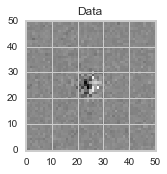

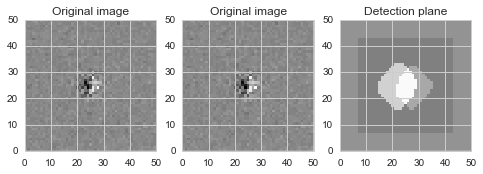

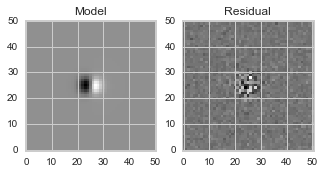

In [9]:
result = genDipoleAndFitIt(z=None, w=51, h=51, xc=25., yc=25., psfWidth=2., separation=0.4, rotAngle=0.,
                              flux=3000., noise=1., verbose=True, display=True)

Result - fit looks okay even though chisq is high. We should definitely be storing the chisq as well.

Try it again.

N SOURCES: 1
2
FOOTPRINT CENTER: 25 27
FOOTPRINT CENTER: 24 22
FINAL FOOTPRINT CENTER: 25 27
FINAL FOOTPRINT CENTER: 24 22
 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "fluxNeg"
 - Adding parameter for hint "psfWidth"
 - Adding parameter for hint "sigma2"
 - Adding parameter for hint "ampl2"
 - Adding parameter for hint "noise"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "psfWidth"
 - Adding parameter "ampl2"
 - Adding parameter "noise"
 - Adding parameter "fluxNeg"
 - Adding parameter "sigma2"
[[Model]]
    Model(dipoleFunc)
[[Fit Statistics]]
    # function evals   = 437
    # data points      = 2601
    # variables        = 6
    chi-square         = 11211.279
    reduced chi-square = 4.32

/Users/dreiss/PYTHONUSERBASE/lib/python2.7/site-packages/lmfit/confidence.py:298: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(flux=8312.41933831) = 0.0 < max(sigmas).
  warn(errmsg)


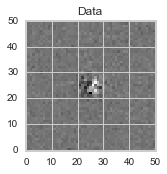

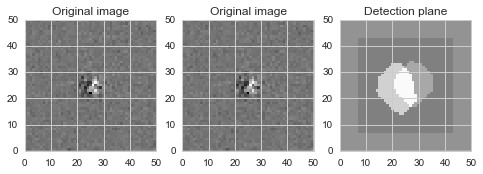

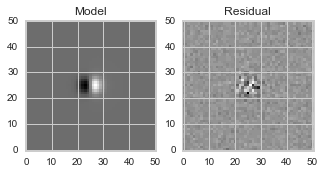

In [10]:
result = genDipoleAndFitIt(z=None, w=51, h=51, xc=25., yc=25., psfWidth=2., separation=0.4, rotAngle=0.,
                              flux=3000., noise=1., verbose=True, display=True)

In [11]:
print result

resultsOutput(inputCentroidX=25.0, inputCentroidY=25.0, inputSeparation=0.4, inputRotation=0.0, inputFlux=3000.0, inputPosCentroidX=25.199999999999999, inputPosCentroidY=25.0, inputNegCentroidX=24.800000000000001, inputNegCentroidY=25.0, psfFitPosCentroidX=25.116482221195835, psfFitPosCentroidY=24.924361993182348, psfFitNegCentroidX=24.921880118760278, psfFitNegCentroidY=24.919017029693759, psfFitPosFlux=6927.0161152554738, psfFitNegFlux=-6840.7711611311233, psfFitCentroidX=25.019181169978054, psfFitCentroidY=24.921689511438053, psfFitOrientation=1.573296854038513, psfFitSignaltoNoise=0.036151104151046949)


## First test - a very closely-separated dipole for a source with a large flux...

N SOURCES: 1
2
FOOTPRINT CENTER: 25 28
FOOTPRINT CENTER: 24 22
FINAL FOOTPRINT CENTER: 25 28
FINAL FOOTPRINT CENTER: 24 22


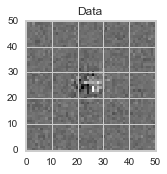

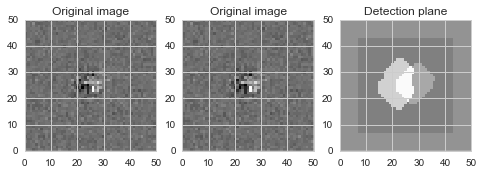

In [140]:
x, y, z = genDipole(w=51, h=51, xc=25., yc=25., psfWidth=2., separation=0.4, rotAngle=0., 
                flux=3000., noise=1., display=True)

s = detectDipoleSources(z, psfWidth=2., noise=1., verbose=True, display=True)

/Users/dreiss/PYTHONUSERBASE/lib/python2.7/site-packages/lmfit/confidence.py:298: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(flux=895.05529884) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/dreiss/PYTHONUSERBASE/lib/python2.7/site-packages/lmfit/confidence.py:298: UserWarning: Warning, rel_change=-0.00129307837955 < 0.01  at iteration 23 and prob(flux=6265.38709188) = 0.32281149752 < max(sigmas).
  warn(errmsg)
/Users/dreiss/PYTHONUSERBASE/lib/python2.7/site-packages/lmfit/confidence.py:298: UserWarning: Warning, rel_change=0.0 < 0.01  at iteration 1 and prob(fluxNeg=864.511555171) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/dreiss/PYTHONUSERBASE/lib/python2.7/site-packages/lmfit/confidence.py:298: UserWarning: Warning, rel_change=-0.0262565556353 < 0.01  at iteration 14 and prob(fluxNeg=4106.42988706) = 0.31429217301 < max(sigmas).
  warn(errmsg)


 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "fluxNeg"
 - Adding parameter for hint "psfWidth"
 - Adding parameter for hint "sigma2"
 - Adding parameter for hint "ampl2"
 - Adding parameter for hint "noise"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "psfWidth"
 - Adding parameter "ampl2"
 - Adding parameter "noise"
 - Adding parameter "fluxNeg"
 - Adding parameter "sigma2"
[[Model]]
    Model(dipoleFunc)
[[Fit Statistics]]
    # function evals   = 104
    # data points      = 2601
    # variables        = 6
    chi-square         = 9846.394
    reduced chi-square = 3.794
[[Variables]]
    xcenPos:    25.4336895 +/- 0.892145 (3.51%) (init= 24)
    ycenPos:    24.4427140 +/- 0.241496 (0.99%) (

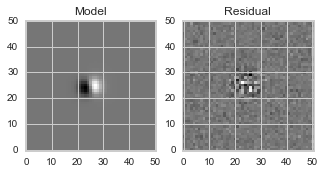

In [141]:
result = fitDipole(z, psfWidth=2., verbose=True, display=True, tol=1e-4)

In [134]:
print result.nfree, result.chisqr, result.redchi, result.success, result.message, result.ier

2595 10282.0840496 3.96226745651 True Tolerance seems to be too small. 1


### Plot confidence intervals...

see https://lmfit.github.io/lmfit-py/confidence.html

In [135]:
ci, trace = lmfit.conf_interval(result, result, sigmas=[0.68,0.95],
                                trace=True, verbose=False)

In [136]:
lmfit.printfuncs.report_ci(ci)

            95.00%    68.00%    _BEST_    68.00%    95.00%
 xcenPos:  -0.93311  -0.82310  26.14027  +0.22384  +0.47671
 ycenPos:  -0.27850  -0.16585  25.28417  +0.11603  +0.23739
 xcenNeg:  -0.44754  -0.21245  24.35576  +0.78529  +0.89673
 ycenNeg:  -0.19579  -0.09834  25.02594  +0.12594  +0.23216
 flux   :-249.98947-142.49860 830.17683      +inf      +inf
 fluxNeg:-251.78386-143.14788 845.03810      +inf      +inf


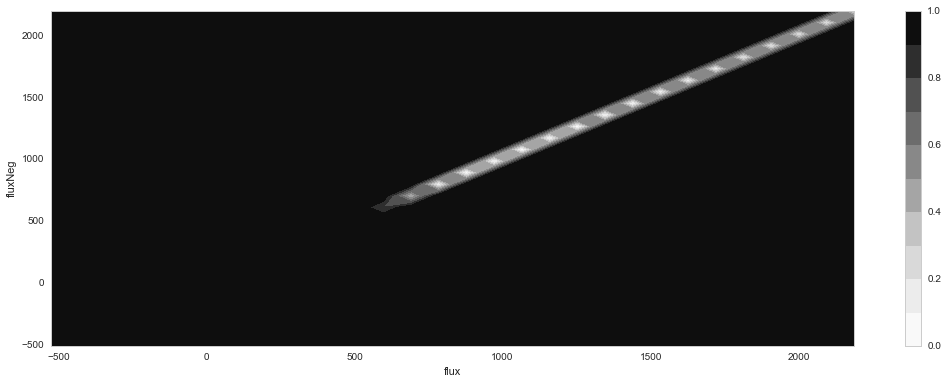

In [137]:
cx, cy, grid = lmfit.conf_interval2d(result, result, 'flux', 'fluxNeg', 30, 30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('flux')
plt.colorbar()
plt.ylabel('fluxNeg')

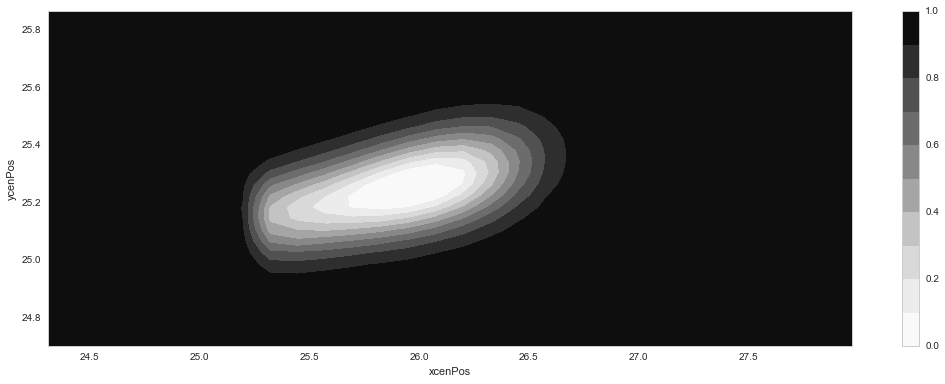

In [138]:
cx, cy, grid = lmfit.conf_interval2d(result, result, 'xcenPos','ycenPos', 30, 30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('xcenPos')
plt.colorbar()
plt.ylabel('ycenPos')

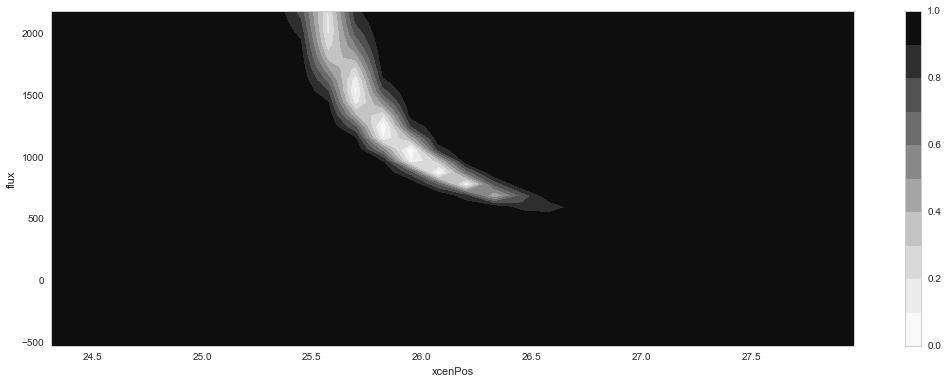

In [139]:
cx, cy, grid = lmfit.conf_interval2d(result, result, 'xcenPos','flux', 30, 30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('xcenPos')
plt.colorbar()
plt.ylabel('flux')

## For comparison: a widely separated dipole...

N SOURCES: 1
2
FOOTPRINT CENTER: 25 28
FOOTPRINT CENTER: 25 22
FINAL FOOTPRINT CENTER: 25 28
FINAL FOOTPRINT CENTER: 25 22


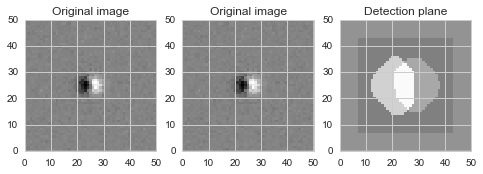

In [77]:
x, y, z = genDipole(w=51, h=51, xc=25., yc=25., psfWidth=2., separation=2.4, rotAngle=0., 
                flux=3000., noise=1., display=False)

s = detectDipoleSources(z, psfWidth=2., noise=1., verbose=True, display=True)

 - Adding parameter for hint "xcenPos"
 - Adding parameter for hint "ycenPos"
 - Adding parameter for hint "xcenNeg"
 - Adding parameter for hint "ycenNeg"
 - Adding parameter for hint "flux"
 - Adding parameter for hint "fluxNeg"
 - Adding parameter for hint "psfWidth"
 - Adding parameter for hint "sigma2"
 - Adding parameter for hint "ampl2"
 - Adding parameter for hint "noise"
 - Adding parameter "flux"
 - Adding parameter "xcenPos"
 - Adding parameter "ycenPos"
 - Adding parameter "xcenNeg"
 - Adding parameter "ycenNeg"
 - Adding parameter "psfWidth"
 - Adding parameter "ampl2"
 - Adding parameter "noise"
 - Adding parameter "fluxNeg"
 - Adding parameter "sigma2"
[[Model]]
    Model(dipoleFunc)
[[Fit Statistics]]
    # function evals   = 94
    # data points      = 2601
    # variables        = 6
    chi-square         = 10177.357
    reduced chi-square = 3.922
[[Variables]]
    xcenPos:    25.9846467 +/- 0.071395 (0.27%) (init= 26)
    ycenPos:    25.1082486 +/- 0.022698 (0.09%) (

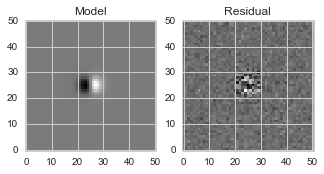

In [82]:
result = fitDipole(z, psfWidth=2., verbose=True, display=True, tol=1e-3)

In [84]:
ci, trace = lmfit.conf_interval(result, result, sigmas=[0.68,0.95],
                                trace=True, verbose=False)

In [85]:
lmfit.printfuncs.report_ci(ci)
cx, cy, grid = lmfit.conf_interval2d(result, result, 'flux','fluxNeg', 30, 30)

            95.00%    68.00%    _BEST_    68.00%    95.00%
 xcenPos:  -0.16311  -0.08332  25.98465  +0.06952  +0.13372
 ycenPos:  -0.04414  -0.02222  25.10825  +0.02572  +0.04835
 xcenNeg:  -0.13958  -0.07293  23.99036  +0.08515  +0.16733
 ycenNeg:  -0.04560  -0.02291  24.99364  +0.02409  +0.04559
 flux   :-366.48708-201.274713573.31261+290.46510+622.72603
 fluxNeg:-366.25176-201.121283463.44679+290.43336+622.64047


In [88]:
print result.nfree, result.chisqr, result.redchi, result.success, result.message, result.ier

2595 10177.3567336 3.92191010928 True Tolerance seems to be too small. 1


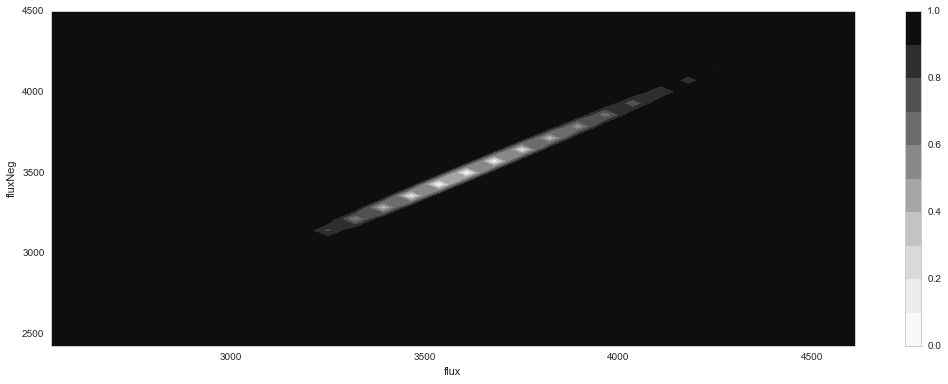

In [87]:
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('flux')
plt.colorbar()
plt.ylabel('fluxNeg')

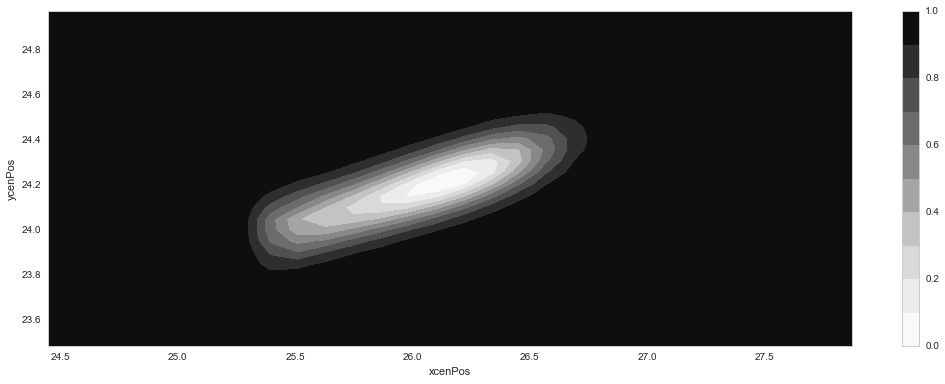

In [105]:
cx, cy, grid = lmfit.conf_interval2d(result, result, 'xcenPos','ycenPos', 30, 30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('xcenPos')
plt.colorbar()
plt.ylabel('ycenPos')

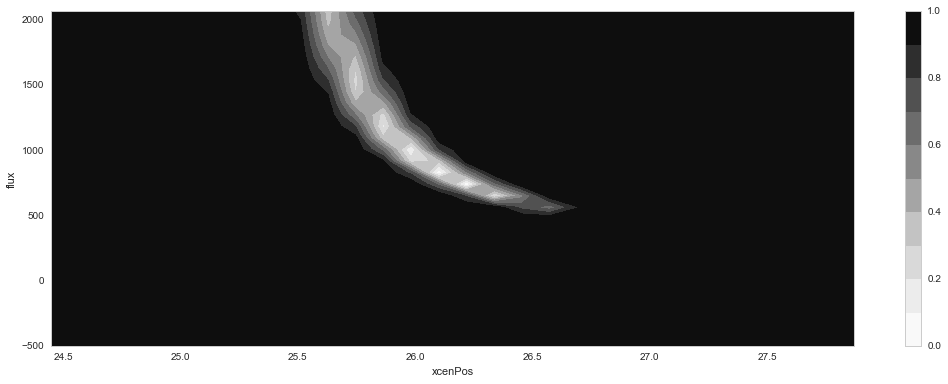

In [106]:
cx, cy, grid = lmfit.conf_interval2d(result, result, 'xcenPos','flux', 30, 30)
plt.contourf(cx, cy, grid, np.linspace(0,1,11))
plt.xlabel('xcenPos')
plt.colorbar()
plt.ylabel('flux')